# **Importing Libraries**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
dataset=pd.read_csv('/content/Placement_Dataset.csv')

In [38]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# **Checking for null or missing values**





In [39]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [40]:
dataset.shape

(215, 15)

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


# **Replacing missing values with the median value**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


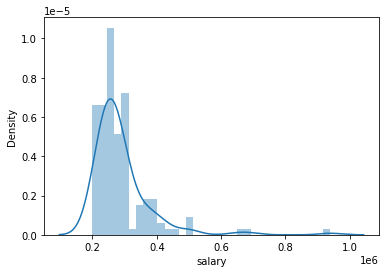

In [42]:
sns.distplot(dataset.salary)

In [43]:
dataset['salary'].fillna(dataset['salary'].median(),inplace=True)

In [44]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

* Missing values have been replaced with the median value

In [49]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [210]:
sns.set_style('whitegrid')

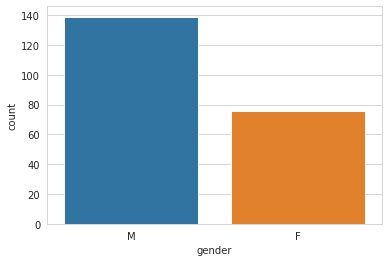

In [211]:
sns.countplot(x='gender',data=dataset)

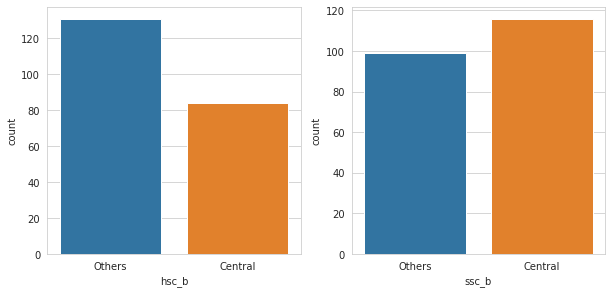

In [158]:
plt.figure(figsize=(10,10))

plt.subplot(221)
sns.countplot(x='hsc_b',data=dataset)



plt.subplot(222)
sns.countplot(x='ssc_b',data=dataset)



* Board Of Education does not affect Placement Status much

In [219]:
N_placed=dataset[dataset["status"]=="Not Placed"]
Placed=dataset[dataset["status"]=="Placed"]


Text(0.5, 1.0, 'Not Placed Student')

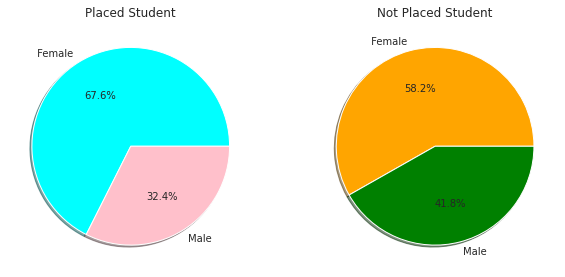

In [216]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.pie(Placed["gender"].value_counts(),labels={"Male"," Female"},colors={"cyan", "pink"},shadow=True,autopct = '%1.1f%%')
plt.title("Placed Student")


plt.subplot(222)
plt.pie(N_placed["gender"].value_counts(),labels={"Male"," Female"},colors={"green", "orange"},shadow=True,autopct = '%1.1f%%')
plt.title("Not Placed Student")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


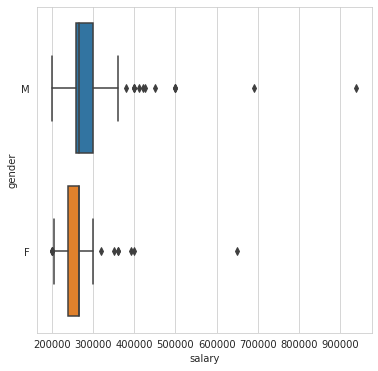

In [220]:
plt.figure(figsize=(6,6))
sns.boxplot("salary", "gender", data=dataset)


From the above box plot we can say that there is more no. of outlier in Male students than Female students in terms of Salary.

Insights

*  More outliers on Male -> Male students are getting high CTC jobs.
*  Male students are offered slightly greater salary than female on an average.
 








# **Does Secondary Education affect placements?**

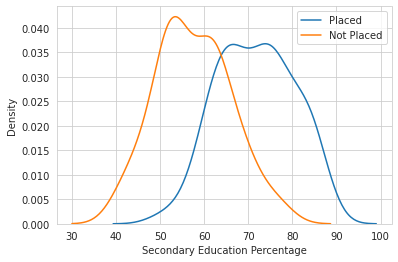

In [153]:
#Kernel-Density Plot
sns.kdeplot(dataset.ssc_p[ dataset.status=="Placed"])
sns.kdeplot(dataset.ssc_p[ dataset.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

* All students with Secondary Education Percentage above 90% are placed
* All students with Secondary Education Percentage below 50% are not-placed
* Students with good Secondary Education Percentage are placed on average.

# **Does Higher Secondary School affect Placements?**





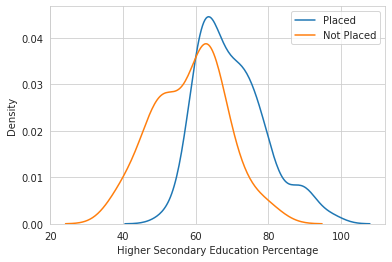

In [173]:
#Kernel-Density Plot
sns.kdeplot(dataset.hsc_p[ dataset.status=="Placed"])
sns.kdeplot(dataset.hsc_p[ dataset.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")
plt.show()

* Overlap here too. More placements for percentage above 65%
* Straight drop below 60 in placements -> Perntage must be atleast 60 for chance of being placed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


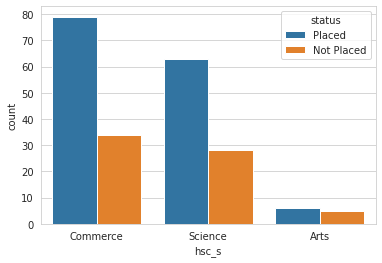

In [174]:
sns.countplot("hsc_s", hue="status", data=dataset)
plt.show()

* We have very less students with Arts specialization.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


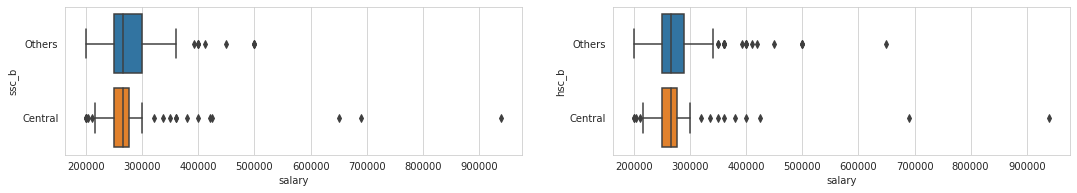

In [171]:
plt.figure(figsize =(18,6))

plt.subplot(221)
sns.boxplot("salary", "ssc_b", data=dataset)

plt.subplot(222)
sns.boxplot("salary","hsc_b",data=dataset)

* Outliers on both, but students from Central Board are getting the highly paid jobs.


* High salary from both Central and Other.
* High salary for both high and low percentage.
* Thus, both these feature doesnot affect salary.

## **Does Under Graduate affect placements?**

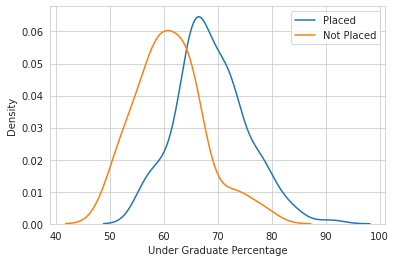

In [177]:
#Kernel-Density Plot
sns.kdeplot(dataset.degree_p[ dataset.status=="Placed"])
sns.kdeplot(dataset.degree_p[ dataset.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Under Graduate Percentage")
plt.show()

* Overlap here too. But More placements for percentage above 65.
* UG Percentage least 50% to get placement

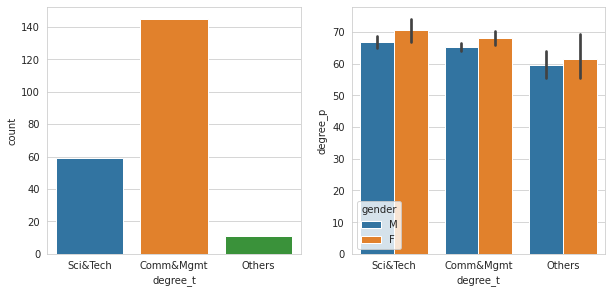

In [175]:
plt.figure(figsize=(10,10))

plt.subplot(221)
sns.countplot(x='degree_t', data=dataset)

plt.subplot(222)
sns.barplot(x='degree_t',y='degree_p',hue='gender',data=dataset)

* We have very less students with "Other". We cant make decision from few cases

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


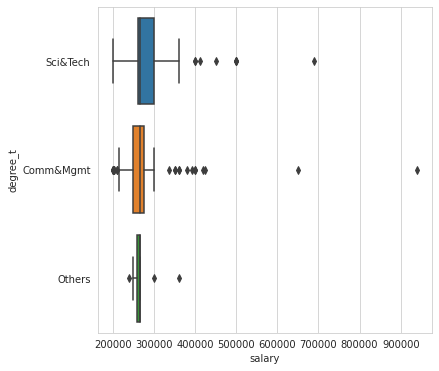

In [180]:
plt.figure(figsize =(6,6))
sns.boxplot("salary", "degree_t", data=dataset)
plt.show()

* Science&Tech students getting more salary on average
* Management students are getting more highly paid  jobs.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


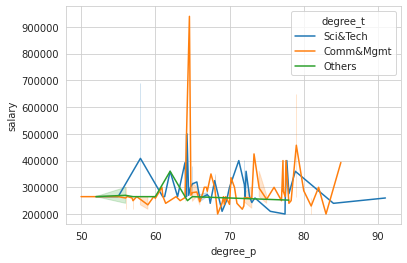

In [182]:
sns.lineplot("degree_p", "salary", hue="degree_t", data=dataset)
plt.show()

* Percentage does not seem to affect salary 


## **Does Work Experience affect placements?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


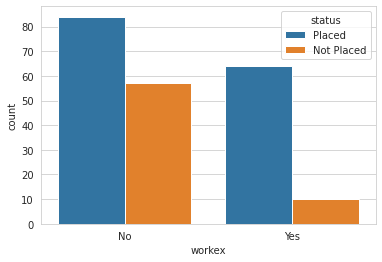

In [183]:
sns.countplot("workex",hue="status", data=dataset)

* **This affects Placement**. Very few students with work experience not getting placed!


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


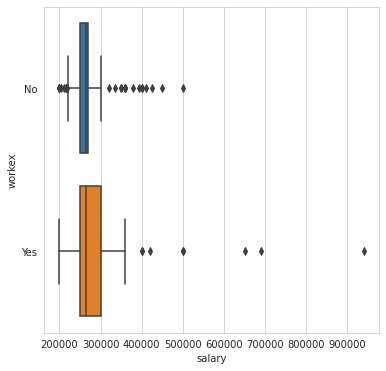

In [184]:
plt.figure(figsize =(6,6))
sns.boxplot("salary", "workex", data=dataset)
plt.show()

* Outliers (High salary than average) on bith end but students with experience getting dream jobs

## **Employability test percentage**

Text(0.5, 0, 'Employability test percentage')

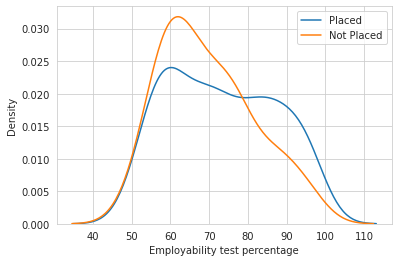

In [198]:
#Kernel-Density Plot
sns.kdeplot(dataset.etest_p[ dataset.status=="Placed"])
sns.kdeplot(dataset.etest_p[ dataset.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")

* High overlap -> It does not affect placement status much


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


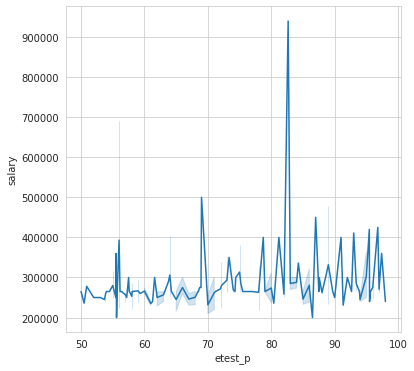

In [199]:
plt.figure(figsize=(6,6))
sns.lineplot("etest_p", "salary", data=dataset)

* does not affect placements and salary much

# **Specialisation (Post Graduate Specialization)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


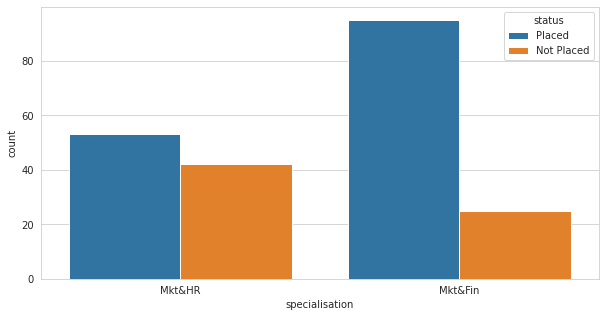

In [200]:
fig=plt.figure(figsize=(10,5))
sns.countplot("specialisation", hue="status", data=dataset)
plt.show()

* Marketing and Finance are the most demanded specialisation among the two specialisation according to the given
* This feature affects Placement status.
* Comparitively very low not-placed students in Mkt&Fin Section





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


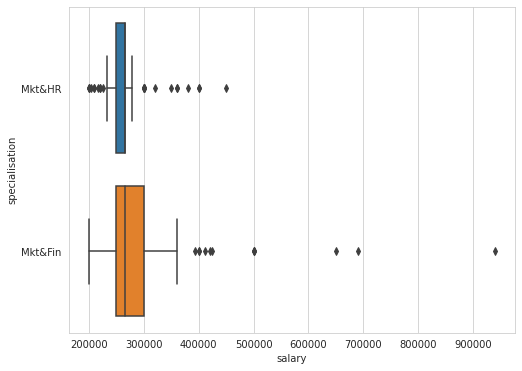

In [202]:
plt.figure(figsize =(8,6))
sns.boxplot("salary", "specialisation", data=dataset)


* More Highly Paid Jobs for Mkt & Fin students



# **Does MBA Percentage affect placements?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


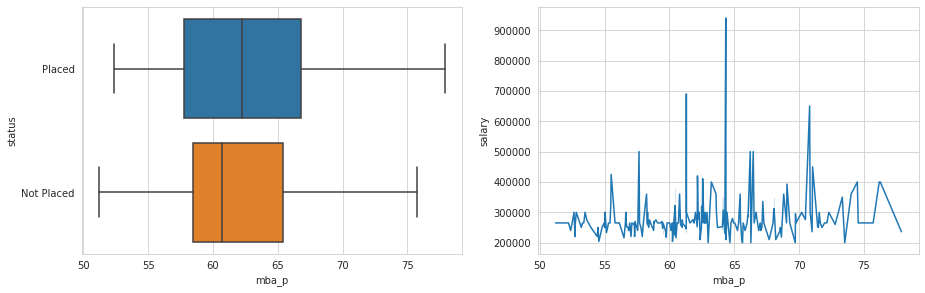

In [208]:
plt.figure(figsize =(15,10))

plt.subplot(221)
sns.boxplot("mba_p", "status", data=dataset)

plt.subplot(222)
sns.lineplot("mba_p", "salary", data=dataset)

* MBA Percentage also deos not affect salary much